In [6]:
!pip uninstall -y torch torchvision torchaudio
!pip install torch==1.13.1 torchvision==0.14.1 torchaudio==0.13.1
!pip install mxnet==1.9.1 gluoncv==0.10.5 numpy==1.23.5


  Using cached torch-1.13.1-cp311-cp311-manylinux1_x86_64.whl.metadata (24 kB)
ERROR: Ignored the following yanked versions: 0.1.6, 0.1.7, 0.1.8, 0.1.9, 0.2.0, 0.2.1, 0.2.2, 0.2.2.post2, 0.2.2.post3, 0.15.0
ERROR: Could not find a version that satisfies the requirement torchvision==0.14.1 (from versions: 0.15.1, 0.15.2, 0.16.0, 0.16.1, 0.16.2, 0.17.0, 0.17.1, 0.17.2, 0.18.0, 0.18.1, 0.19.0, 0.19.1, 0.20.0, 0.20.1, 0.21.0, 0.22.0, 0.22.1, 0.23.0)
ERROR: No matching distribution found for torchvision==0.14.1


In [7]:
from gluoncv import model_zoo, data, utils
import matplotlib.pyplot as plt


In [8]:
net = model_zoo.get_model('yolo3_darknet53_voc', pretrained=True)

In [10]:
im_fname = utils.download('https://raw.githubusercontent.com/zhreshold/' +
                          'mxnet-ssd/master/data/demo/dog.jpg',
                          path='dog.jpg')
x, img = data.transforms.presets.yolo.load_test(im_fname, short=512)
print('Shape of pre-processed image:', x.shape)

Shape of pre-processed image: (1, 3, 512, 683)


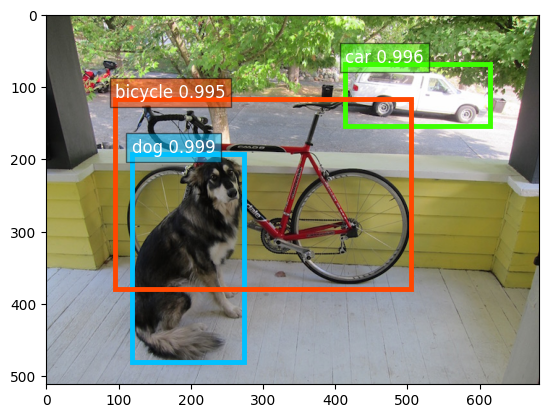

In [11]:
class_IDs, scores, bounding_boxs = net(x)

ax = utils.viz.plot_bbox(img, bounding_boxs[0], scores[0],
                         class_IDs[0], class_names=net.classes)
plt.show()